In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import os
import sys
from pathlib import Path
import sranodec as anom
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

In [73]:
# less than period
amp_window_size=100
# (maybe) as same as period
series_window_size=24
# a number enough larger than period
score_window_size=100
percentile = 92
range_begin = 20
range_end = 95
anom_window_size = 12
n_windows_per_plot = 24
overlapping = 0

In [3]:
#df = pd.read_csv('data/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv', parse_dates=['timestamp'])
df = pd.read_csv('data/NAB/data/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv', parse_dates=['timestamp'])

#df.head(10)

In [4]:
input_path = Path.cwd()/'data/NAB/data/realAWSCloudwatch/'

In [5]:
list_input_dir = os.listdir(input_path)

In [6]:
list_input_dir

['ec2_cpu_utilization_825cc2.csv',
 'ec2_cpu_utilization_53ea38.csv',
 'ec2_cpu_utilization_c6585a.csv',
 'ec2_cpu_utilization_24ae8d.csv',
 'ec2_cpu_utilization_77c1ca.csv',
 'rds_cpu_utilization_cc0c53.csv',
 'ec2_cpu_utilization_fe7f93.csv',
 'ec2_cpu_utilization_ac20cd.csv',
 'rds_cpu_utilization_e47b3b.csv',
 'ec2_cpu_utilization_5f5533.csv']

In [7]:
input_signal = []
for i in list_input_dir:
    aux = pd.read_csv(input_path/i, parse_dates=['timestamp'])
    ###
    ######################## simulate inputation ###########################
    aux_signal = pd.DataFrame()
    aux_signal['datetime'] = aux.timestamp
    aux_signal['cpu'] = aux.value
    aux_signal['mem'] = aux.value * np.ravel(np.random.rand(1, 4032)) 
    aux_signal['cpu_anomaly'] = 0
    aux_signal['mem_anomaly'] = 0
    
    print(i[:-5], "shape: ", aux_signal.shape)
    ############################################################################
    input_signal.append(aux_signal)


ec2_cpu_utilization_825cc shape:  (4032, 5)
ec2_cpu_utilization_53ea3 shape:  (4032, 5)
ec2_cpu_utilization_c6585 shape:  (4032, 5)
ec2_cpu_utilization_24ae8 shape:  (4032, 5)
ec2_cpu_utilization_77c1c shape:  (4032, 5)
rds_cpu_utilization_cc0c5 shape:  (4032, 5)
ec2_cpu_utilization_fe7f9 shape:  (4032, 5)
ec2_cpu_utilization_ac20c shape:  (4032, 5)
rds_cpu_utilization_e47b3 shape:  (4032, 5)
ec2_cpu_utilization_5f553 shape:  (4032, 5)


<AxesSubplot:>

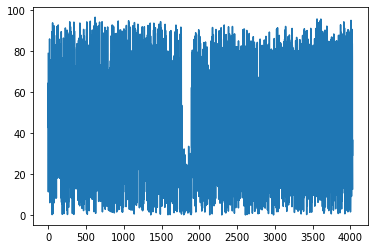

In [8]:
input_signal[0].mem.plot()

In [9]:
score_cpu = []
score_mem = []

index_changes_cpu = []
index_changes_mem = []

anomaly_cadidates_cpu = []
anomaly_cadidates_mem = []

spec = anom.Silency(amp_window_size, series_window_size, score_window_size)

for i in range(len(input_signal)):
    #score_aux = pd.DataFrame()
    #score_aux["cpu"] = spec.generate_anomaly_score(input_signal[i].cpu.values)
    #score_aux["mem"] = spec.generate_anomaly_score(input_signal[i].mem.values)
    
    #index_changes_aux = pd.DataFrame()
    #index_changes_aux["cpu"] = np.where(score_aux["cpu"].values > np.percentile(score_aux["cpu"].values, 90))[0]
    #index_changes_aux["mem"] = np.where(score_aux["mem"].values > np.percentile(score_aux["mem"].values, 90))[0]
    
    #score.append(score_aux)
    #index_changes.append(index_changes_aux)
    
    score_aux_cpu = spec.generate_anomaly_score(input_signal[i].cpu.values)
    score_aux_mem = spec.generate_anomaly_score(input_signal[i].mem.values)
    
    index_changes_aux_cpu = np.where(score_aux_cpu > np.percentile(score_aux_cpu, percentile))[0]
    index_changes_aux_mem = np.where(score_aux_mem > np.percentile(score_aux_mem, percentile))[0]
    
    aux_anomaly_cadidates_cpu = pd.DataFrame(index=index_changes_aux_cpu)
    aux_anomaly_cadidates_mem = pd.DataFrame(index=index_changes_aux_mem)
    
    #aux_anomaly_cadidates_cpu['cpu'] = input_signal[i].loc[index_changes_aux_cpu,'cpu']
    #aux_anomaly_cadidates_mem['mem'] = input_signal[i].loc[index_changes_aux_mem,'mem']

    aux_anomaly_cadidates_cpu['cpu'] = input_signal[i].loc[index_changes_aux_cpu,'cpu']
    aux_anomaly_cadidates_mem['mem'] = input_signal[i].loc[index_changes_aux_mem,'mem']
    
    score_cpu.append(score_aux_cpu)
    index_changes_cpu.append(index_changes_aux_cpu)
    
    score_mem.append(score_aux_mem)
    index_changes_mem.append(index_changes_aux_mem)
    
    anomaly_cadidates_cpu.append(aux_anomaly_cadidates_cpu)
    anomaly_cadidates_mem.append(aux_anomaly_cadidates_mem)
    

/home/jfialho/.local/lib/python3.7/site-packages/sranodec/util.py:31: RuntimeWarning: invalid value encountered in double_scalars
  slope = [(last_value - v) / i for (i, v) in enumerate(values[::-1])]


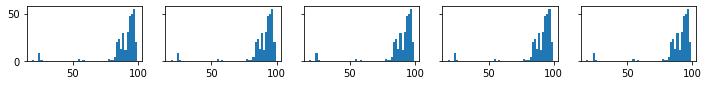

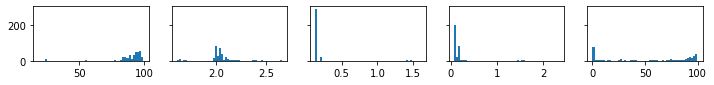

In [10]:
for j in range(2):
    fig, axs = plt.subplots(1, 5, figsize=(12, 1), sharey=True)
    for i in range(5):
        axs[i].hist(anomaly_cadidates_cpu[int(j*i)],bins=50)

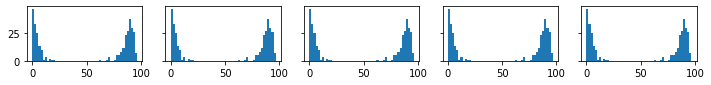

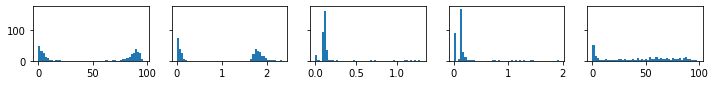

In [11]:
for j in range(2):
    fig, axs = plt.subplots(1, 5, figsize=(12, 1), sharey=True)
    for i in range(5):
        axs[i].hist(anomaly_cadidates_mem[int(j*i)],bins=50)

In [12]:
'''
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=test_signal,
    name='observation',
    mode='lines'
))

fig.add_trace(go.Scatter(
    x = final2.index.tolist(),
    y=np.array(final2.cpu),
    name='anomaly',
    mode='markers'
))


fig.show()
'''

"\nfig = go.Figure()\n\nfig.add_trace(go.Scatter(\n    y=test_signal,\n    name='observation',\n    mode='lines'\n))\n\nfig.add_trace(go.Scatter(\n    x = final2.index.tolist(),\n    y=np.array(final2.cpu),\n    name='anomaly',\n    mode='markers'\n))\n\n\nfig.show()\n"

In [80]:
anomaly_cpu_per_window = []
anomaly_mem_per_window = []


for i in range(len(input_signal)):
    curr_list_anomaly_cpu_per_window = []
    curr_list_anomaly_mem_per_window = []
    aux=0
    
    range_cpu_index_anomaly = anomaly_cadidates_cpu[i][(anomaly_cadidates_cpu[i].cpu <= range_begin) | 
                                                       (anomaly_cadidates_cpu[i].cpu >= range_end)].index
    
    range_mem_index_anomaly = anomaly_cadidates_mem[i][(anomaly_cadidates_mem[i].mem <= range_begin) | 
                                                     (anomaly_cadidates_mem[i].mem >= range_end)].index
    
    input_signal[i].loc[range_cpu_index_anomaly,'cpu_anomaly'] = 1
    input_signal[i].loc[range_mem_index_anomaly,'mem_anomaly'] = 1


    #for j in range(0,input_signal[0].shape[0]-anom_window_size,anom_window_size):
    for j in range(0,input_signal[0].shape[0],anom_window_size):
        #print(j)
        curr_range = range(j,int((aux+1)*anom_window_size))
        #print(j,":",int((aux+1)*anom_window_size-1))
        #print(curr_range)
        curr_list_anomaly_cpu_per_window.append(input_signal[i].loc[j:int((aux+1)*anom_window_size-1),'cpu_anomaly'].sum())
        curr_list_anomaly_mem_per_window.append(input_signal[i].loc[j:int((aux+1)*anom_window_size-1),'mem_anomaly'].sum())
        aux+=1
    anomaly_cpu_per_window.append(curr_list_anomaly_cpu_per_window)
    anomaly_mem_per_window.append(curr_list_anomaly_mem_per_window)


# Plot all the servers

θ cpu:  2.39°
θ mem:  -0.57°
θ mean: 0.9°


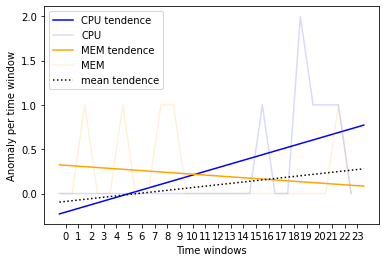

θ cpu:  -1.05°
θ mem:  -2.56°
θ mean: -0.7°


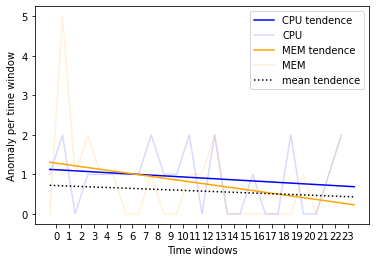

θ cpu:  -3.88°
θ mem:  -0.6°
θ mean: -2.29°


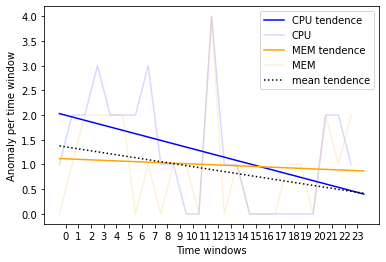

θ cpu:  0.92°
θ mem:  -3.63°
θ mean: -0.55°


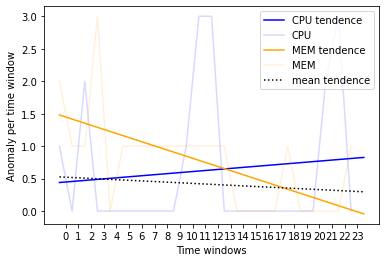

θ cpu:  -3.81°
θ mem:  -1.32°
θ mean: -2.44°


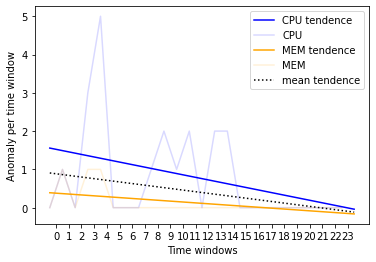

θ cpu:  1.77°
θ mem:  1.92°
θ mean: 2.56°


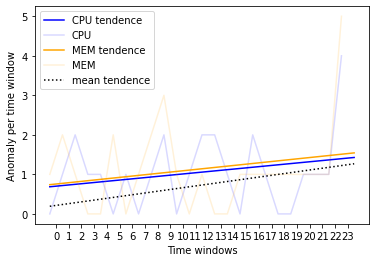

θ cpu:  -5.96°
θ mem:  -4.87°
θ mean: -4.9°


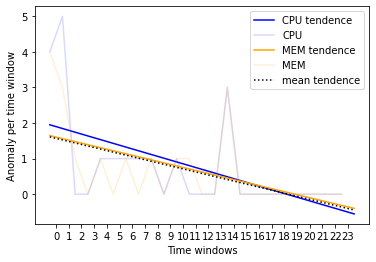

θ cpu:  0.0°
θ mem:  -0.75°
θ mean: 0.0°


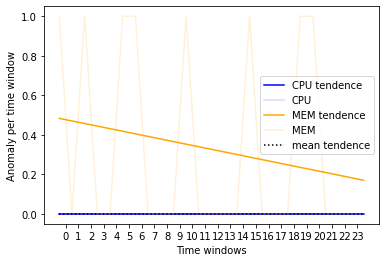

θ cpu:  0.35°
θ mem:  1.3°
θ mean: 0.85°


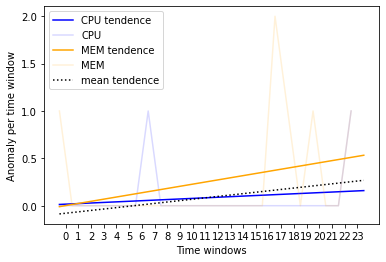

θ cpu:  0.0°
θ mem:  -0.7°
θ mean: -0.05°


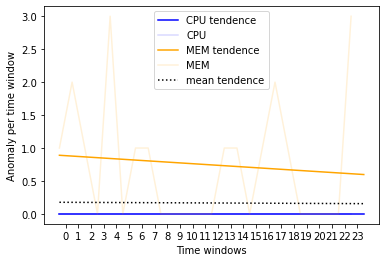

In [82]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.5

for i in range(len(anomaly_cpu_per_window)):
    # Choose the height of the blue bars
    data_cpu = anomaly_cpu_per_window[i][-24:]

    # Choose the height of the cyan bars
    data_mem = anomaly_mem_per_window[i][-24:]

    # Choose the height of the error bars (bars1)
    yer_cpu = [0.5, 0.4, 0.5]

    # Choose the height of the error bars (bars2)
    yer_mem = [1, 0.7, 1]

    # The x position of bars
    r1 = np.arange(len(data_cpu))
    r2 = [x + barWidth for x in r1]

    # linear regression for CPU
    x_cpu = np.array(range(len(data_cpu))).reshape(-1, 1)
    y_cpu = data_cpu

    model = LinearRegression()
    model.fit(x_cpu, y_cpu)

    x_cpu_new = np.linspace(0, len(data_cpu), 1000)
    y_cpu_new = model.predict(x_cpu_new[:, np.newaxis])

    # linear regression for mem
    x_mem = np.array(range(len(data_mem))).reshape(-1, 1)
    y_mem = data_mem

    model = LinearRegression()
    model.fit(x_mem, y_mem)

    x_mem_new = np.linspace(0, len(data_mem), 1000)
    y_mem_new = model.predict(x_mem_new[:, np.newaxis])

    # linear regression for sum
    x_sum = x_cpu
    y_sum = np.add(y_cpu, y_mem)

    model = LinearRegression()
    model.fit(x_sum, y_sum)

    x_sum_new = np.linspace(0, len(data_mem), 1000)
    y_sum_new = model.predict(x_sum_new[:, np.newaxis])

    # linear regression for mean
    x_mean = x_cpu
    y_mean = []
    for i in range(len(y_cpu)): y_mean.append((y_cpu[i]+y_mem[i])//2)

    model = LinearRegression()
    model.fit(x_mean, y_mean)

    x_mean_new = np.linspace(0, len(data_mem), 1000)
    y_mean_new = model.predict(x_mean_new[:, np.newaxis])

    
    # drift forecasting
    
    import statsmodels.api as sm
    #sm.tsa.seasonal_decompose(pd.DataFrame(y_cpu), model='additive').plot()
    #result = sm.tsa.stattools.adfuller(y_cpu)
    #plt.show()

    # Create blue bars
    #plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
    #plt.bar(r1, data_cpu, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='CPU', alpha=0.1)

    # Create cyan bars
    #plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
    #plt.bar(r2, data_mem, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='MEM', alpha=0.1)

    plt.plot(x_cpu_new, y_cpu_new, color = 'blue', label='CPU tendence')
    plt.plot(x_cpu,y_cpu, color = 'blue', label='CPU', alpha=0.15)
    plt.plot(x_mem_new, y_mem_new, color = 'orange', label='MEM tendence')
    plt.plot(x_mem, y_mem, color = 'orange', label='MEM', alpha=0.15)
    #plt.plot(x_sum_new, y_sum_new, color = 'black', label='accumulated tendence', linestyle = 'dashed')
    plt.plot(x_mean_new, y_mean_new, color = 'black', label='mean tendence', linestyle = 'dotted')

    # general layout
    plt.xticks([r + barWidth for r in range(len(data_cpu))], range(len(data_cpu)))
    plt.ylabel('Anomaly per time window')
    plt.xlabel('Time windows')
    plt.legend()

    print("θ cpu:  " + str(round(np.rad2deg(np.arctan2(y_cpu_new[-1] - y_cpu_new[0], x_cpu_new[-1] - x_cpu_new[0])),2))+"°")
    print("θ mem:  " + str(round(np.rad2deg(np.arctan2(y_mem_new[-1] - y_mem_new[0], x_mem_new[-1] - x_mem_new[0])),2))+"°")
    #print("θ sum:  " + str(round(np.rad2deg(np.arctan2(y_sum_new[-1] - y_sum_new[0], x_sum_new[-1] - x_sum_new[0])),2))+"°")
    print("θ mean: " + str(round(np.rad2deg(np.arctan2(y_mean_new[-1] - y_mean_new[0], x_mean_new[-1] - x_mean_new[0])),2))+"°")

    # Show graphic
    plt.show()

# plot all de windows for the same server

In [118]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

theta_cpu = []

target_server = 2
 
# width of the bars
barWidth = 0.5

for i in range(0,len(anomaly_cpu_per_window[target_server])-n_windows_per_plot):
    # Choose the height of the blue bars
    data_cpu = anomaly_cpu_per_window[target_server][i:i+n_windows_per_plot]

    # Choose the height of the cyan bars
    data_mem = anomaly_mem_per_window[target_server][i:i+n_windows_per_plot]

    # Choose the height of the error bars (bars1)
    yer_cpu = [0.5, 0.4, 0.5]

    # Choose the height of the error bars (bars2)
    yer_mem = [1, 0.7, 1]

    # The x position of bars
    r1 = np.arange(len(data_cpu))
    r2 = [x + barWidth for x in r1]

    # linear regression for CPU
    x_cpu = np.array(range(len(data_cpu))).reshape(-1, 1)
    y_cpu = data_cpu

    model = LinearRegression()
    model.fit(x_cpu, y_cpu)

    x_cpu_new = np.linspace(0, len(data_cpu), 1000)
    y_cpu_new = model.predict(x_cpu_new[:, np.newaxis])

    # linear regression for mem
    x_mem = np.array(range(len(data_mem))).reshape(-1, 1)
    y_mem = data_mem

    model = LinearRegression()
    model.fit(x_mem, y_mem)

    x_mem_new = np.linspace(0, len(data_mem), 1000)
    y_mem_new = model.predict(x_mem_new[:, np.newaxis])

    '''
    # linear regression for sum
    x_sum = x_cpu
    y_sum = np.add(y_cpu, y_mem)

    model = LinearRegression()
    model.fit(x_sum, y_sum)

    x_sum_new = np.linspace(0, len(data_mem), 1000)
    y_sum_new = model.predict(x_sum_new[:, np.newaxis])

    # linear regression for mean
    x_mean = x_cpu
    y_mean = []
    for i in range(len(y_cpu)): y_mean.append((y_cpu[i]+y_mem[i])//2)

    model = LinearRegression()
    model.fit(x_mean, y_mean)

    x_mean_new = np.linspace(0, len(data_mem), 1000)
    y_mean_new = model.predict(x_mean_new[:, np.newaxis])

    '''
    
    curr_theta_cpu = np.rad2deg(np.arctan2(y_cpu_new[-1] - y_cpu_new[0], x_cpu_new[-1] - x_cpu_new[0]))
    print(str(i) + " θ cpu:  " + str(round(curr_theta_cpu,2))+"°")

    
    plt.ylim(np.min(anomaly_cpu_per_window[target_server]), np.max(anomaly_cpu_per_window[target_server]))
    
    if curr_theta_cpu <= 0:
        plt.plot(x_cpu_new, y_cpu_new, color = 'blue', label='CPU tendence')
        plt.plot(x_cpu,y_cpu, color = 'blue', label='CPU', alpha=0.15)
    else:
        plt.plot(x_cpu_new, y_cpu_new, color = 'red', label='CPU tendence')
        plt.plot(x_cpu,y_cpu, color = 'red', label='CPU', alpha=0.15) 
        
    #plt.plot(x_mem_new, y_mem_new, color = 'orange', label='MEM tendence')
    #plt.plot(x_mem, y_mem, color = 'orange', label='MEM', alpha=0.15)
    #plt.plot(x_sum_new, y_sum_new, color = 'black', label='accumulated tendence', linestyle = 'dashed')
    #plt.plot(x_mean_new, y_mean_new, color = 'black', label='mean tendence', linestyle = 'dotted')
    # general layout
    #plt.xticks([r + barWidth for r in range(i,i+n_windows_per_plot)], range(i,i+n_windows_per_plot))
    plt.xticks([r + barWidth for r in range(len(data_cpu))], range(i,i+n_windows_per_plot))
    plt.ylabel('Anomaly per time window')
    plt.xlabel('Time windows')
    plt.legend(loc='upper left')
    
    
    #print("θ mem:  " + str(round(np.rad2deg(np.arctan2(y_mem_new[-1] - y_mem_new[0], x_mem_new[-1] - x_mem_new[0])),2))+"°")
    #print("θ sum:  " + str(round(np.rad2deg(np.arctan2(y_sum_new[-1] - y_sum_new[0], x_sum_new[-1] - x_sum_new[0])),2))+"°")
    #print("θ mean: " + str(round(np.rad2deg(np.arctan2(y_mean_new[-1] - y_mean_new[0], x_mean_new[-1] - x_mean_new[0])),2))+"°")

    theta_cpu.append(curr_theta_cpu)
    
    # Show graphic
    #plt.show()
    plt.savefig("gif/"+str(i)+".png")
    plt.clf()

0 θ cpu:  -4.8°
1 θ cpu:  -4.2°
2 θ cpu:  -3.61°
3 θ cpu:  -1.77°
4 θ cpu:  0.07°
5 θ cpu:  0.2°
6 θ cpu:  -0.15°
7 θ cpu:  -0.4°
8 θ cpu:  0.7°
9 θ cpu:  -0.5°
10 θ cpu:  -1.07°
11 θ cpu:  -1.64°
12 θ cpu:  -1.59°
13 θ cpu:  -0.2°
14 θ cpu:  0.67°
15 θ cpu:  1.44°
16 θ cpu:  0.35°
17 θ cpu:  -0.75°
18 θ cpu:  -1.84°
19 θ cpu:  -2.94°
20 θ cpu:  -4.03°
21 θ cpu:  -5.12°
22 θ cpu:  -6.2°
23 θ cpu:  -3.68°
24 θ cpu:  -2.29°
25 θ cpu:  -1.42°
26 θ cpu:  -1.07°
27 θ cpu:  1.1°
28 θ cpu:  3.31°
29 θ cpu:  3.14°
30 θ cpu:  2.34°
31 θ cpu:  1.54°
32 θ cpu:  0.75°
33 θ cpu:  0.52°
34 θ cpu:  0.25°
35 θ cpu:  -0.02°
36 θ cpu:  -0.87°
37 θ cpu:  0.57°
38 θ cpu:  1.92°
39 θ cpu:  2.74°
40 θ cpu:  1.84°
41 θ cpu:  0.95°
42 θ cpu:  0.62°
43 θ cpu:  -0.32°
44 θ cpu:  -1.27°
45 θ cpu:  -2.22°
46 θ cpu:  -3.16°
47 θ cpu:  -2.29°
48 θ cpu:  -1.94°
49 θ cpu:  -1.59°
50 θ cpu:  -1.3°
51 θ cpu:  -0.37°
52 θ cpu:  1.17°
53 θ cpu:  0.95°
54 θ cpu:  0.15°
55 θ cpu:  -0.65°
56 θ cpu:  -1.44°
57 θ cpu:  -1.62°

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

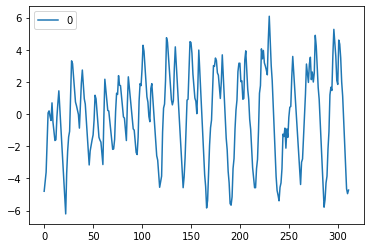

In [119]:
pd.DataFrame(theta_cpu).plot()

In [122]:
import os
import imageio



#X_new = transformer.transform(img)

with imageio.get_writer('theta_cpu_2.gif', mode='I', duration = 0/6) as writer:
    for i in range(312):
        image = imageio.imread("gif/"+str(i)+".png")
        writer.append_data(image) 

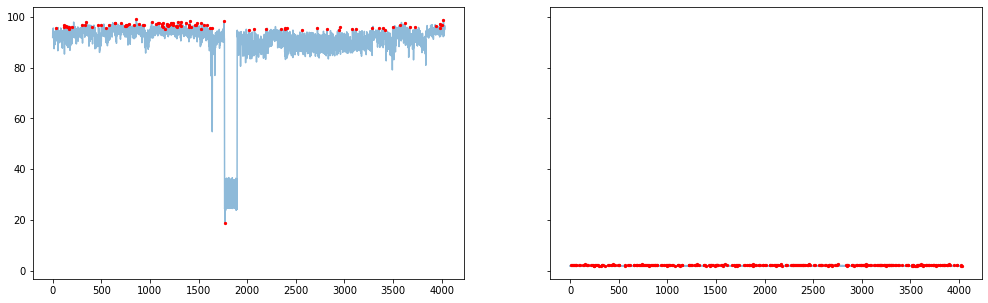

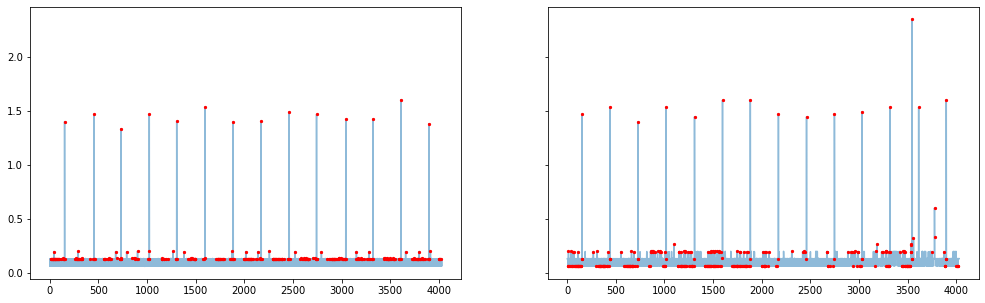

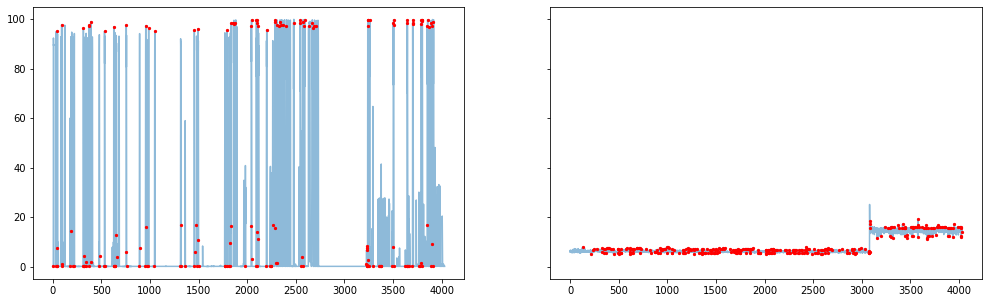

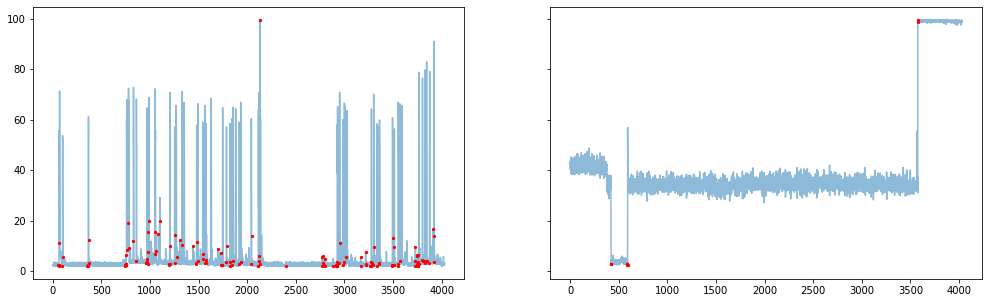

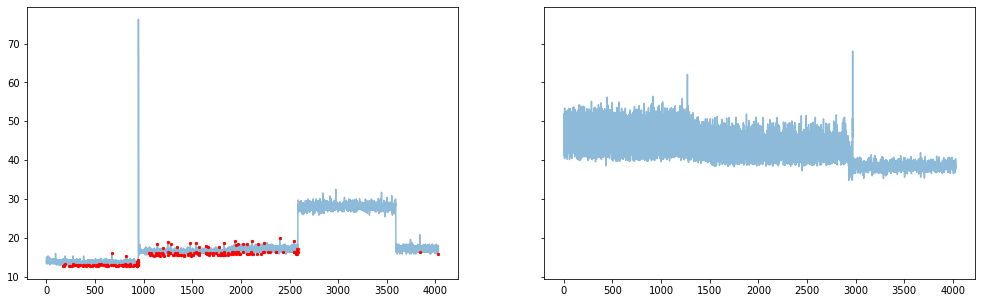

In [58]:
aux=0
for j in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(17, 5), sharey=True)
    for i in range(2):
        axs[i].scatter(input_signal[aux].loc[input_signal[aux].cpu_anomaly == 1,'cpu'].index.tolist(),
                    input_signal[aux].loc[input_signal[aux].cpu_anomaly == 1,'cpu'].values,
                    label='anomaly',s=5,c='red',zorder=10
                   )
        axs[i].plot(input_signal[aux].index.tolist(),
                    input_signal[aux].cpu, label='observation',alpha=0.5,zorder=1
                   )

        aux+=1

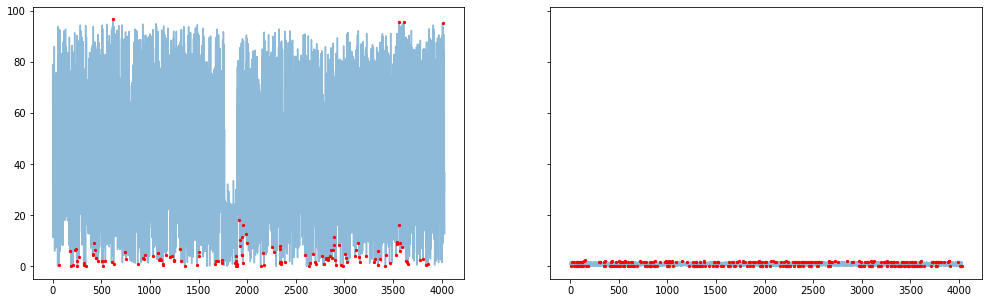

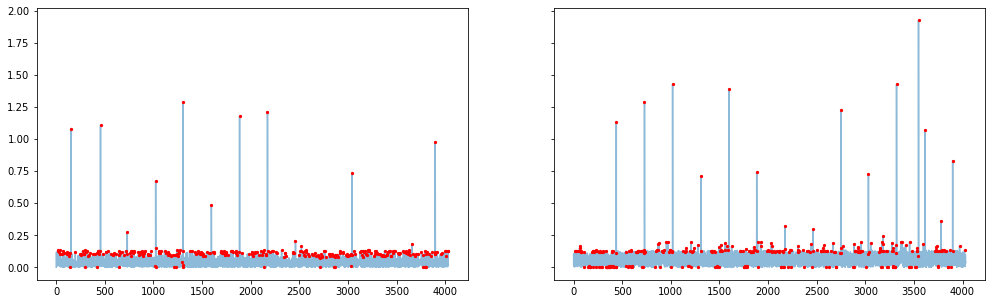

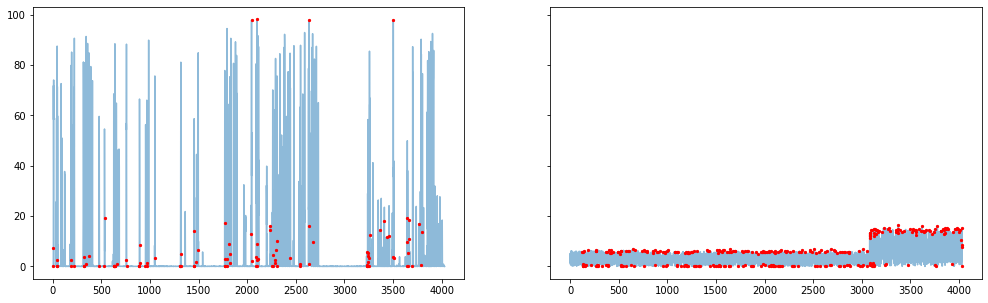

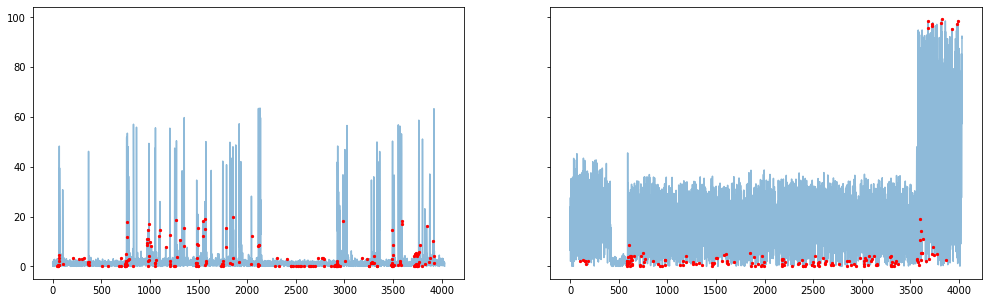

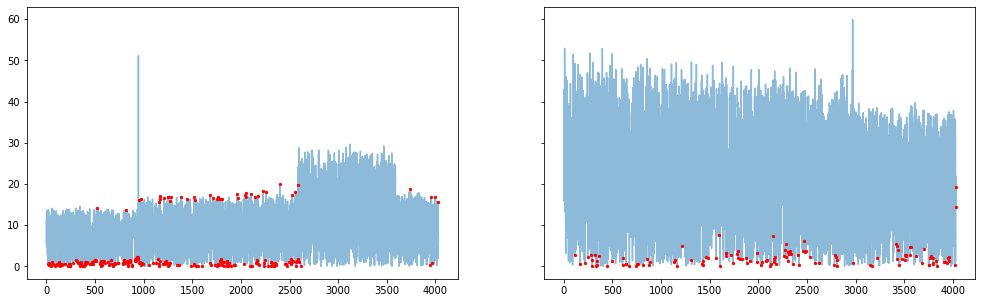

In [61]:
aux=0
for j in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(17, 5), sharey=True)
    for i in range(2):
        axs[i].scatter(input_signal[aux].loc[input_signal[aux].mem_anomaly == 1,'mem'].index.tolist(),
                    input_signal[aux].loc[input_signal[aux].mem_anomaly == 1,'mem'].values,
                    label='anomaly',s=5,c='red',zorder=10
                   )
        axs[i].plot(input_signal[aux].index.tolist(),
                    input_signal[aux].mem, label='observation',alpha=0.5,zorder=1
                   )

        aux+=1

In [68]:
def get_angle_plot(line1, line2, offset = 1, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    l1xy = line1.get_xydata()

    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][2]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(math.degrees(math.atan(slope1))) # Taking only the positive angle

    l2xy = line2.get_xydata()

    # Angle between line2 and x-axis
    slope2 = (l2xy[1][3] - l2xy[0][4]) / float(l2xy[1][0] - l2xy[0][0])
    angle2 = abs(math.degrees(math.atan(slope2)))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return plt.Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")